Belton Manhica

# **Project: Amazon Product Recommendation System**



We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#install a version of numpy that is compactible with surprise
!pip install numpy==1.26.4

**Installing surprise library**

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469543 sha256=b9fec4a02838ab29754f2feaaf7d190e9c537eda2e6b4e0081cb932d18c766f0
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [54]:
#import numpy and pandas
#import numpy as np
import pandas as pd

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import encoding libraries
from sklearn.preprocessing import LabelEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [55]:
#import the data
data = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/Great Learning/ratings_Electronics.csv',header=None, index_col= False)

In [7]:
#check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   1       object 
 2   2       float64
 3   3       int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [56]:
#display the first five rows
data.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [57]:
#replace the column indexes with their correct names
data.columns = ['user_id', 'prod_id', 'rating', 'timestamp']

In [58]:
data.head()

,user_id,prod_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [59]:
#drop the timestamp column
data.drop('timestamp', axis =1, inplace = True)

In [60]:
#copy the data to another dataframe named df
df = data.copy()

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [61]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [62]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [63]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [64]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [65]:
# Print a few rows of dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [66]:
#print the last rows
df_final.tail()

,user_id,prod_id,rating
7824423,A34BZM6S9L7QI4,B00LGQ6HL8,5.0
7824424,A1G650TTTHEAL5,B00LGQ6HL8,5.0
7824425,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [67]:
# Check the number of rows and columns and provide observations
df_final.shape


(65290, 3)

**There are 3 columns and 65290 rows in our data. The number of rows has reduced from 7824482 to 65290**

### **Data types**

In [68]:
# Check Data types and provide observations
df_final.dtypes

,0
user_id,object
prod_id,object
rating,float64


**User_id and Prod_id are categorical data while rating is numerical.**

### **Checking for missing values**

In [69]:
# Check for missing values present and provide observations
df_final.isnull().sum()

,0
user_id,0
prod_id,0
rating,0


**There are no null values.**

### **Summary Statistics**

In [70]:
# Summary statistics of 'rating' variable and provide observations
df_final.describe().T


,count,mean,std,min,25%,50%,75%,max
rating,65290.0,4.294808,0.988915,1.0,4.0,5.0,5.0,5.0


**The average rating of our products is 4.29, and more than 50% of them are 5 star rated and than 75% of them where rated 4 stars and above. This means that many our our products have high ratings, and our customers love them.**

### **Checking the rating distribution**

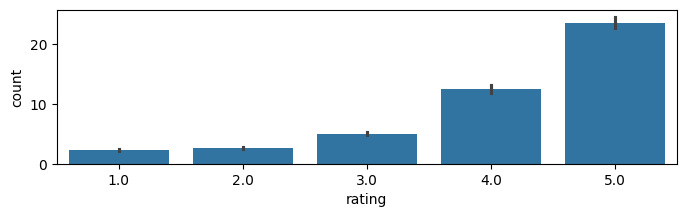

In [22]:
count = df_final.groupby(['user_id'])['rating'].value_counts()
count = pd.DataFrame(count)
plt.figure(figsize = (8,2))
sns.barplot(count, x = 'rating',  y = 'count')
plt.show()


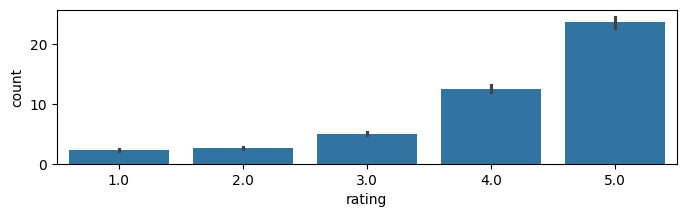

In [24]:
count_ = df_final.groupby(['prod_id'])['rating'].value_counts()
count_ = pd.DataFrame(count)
plt.figure(figsize = (8,2))
sns.barplot(count_, x = 'rating',  y = 'count')
plt.show()


**The majority of items are five star rated and the majority of user gave five star ratings to items**

### **Checking the number of unique users and items in the dataset**

In [25]:
# Number of total rows in the data and number of unique user id and product id in the data
for i in df_final.columns:
  print('\n') # brak a line
  print(f'CHECKING: {i}')
  print('Number of total rows:', df_final[i].count()) #count number of total rows
  print('Unique values:', df_final[i].unique()) #display unique values
  print('Number of unique values:', df_final[i].nunique()) #count the number of unique values
  print(f'Percentage of unique values: {round((df_final[i].nunique()/df_final[i].count())*100,2)}%')




CHECKING: user_id
Number of total rows: 65290
Unique values: ['A3LDPF5FMB782Z' 'A1A5KUIIIHFF4U' 'A2XIOXRRYX0KZY' ... 'A215WH6RUDUCMP'
 'A38C12950IM24P' 'A2J4XMWKR8PPD0']
Number of unique values: 1540
Percentage of unique values: 2.36%


CHECKING: prod_id
Number of total rows: 65290
Unique values: ['1400501466' '1400532655' '1400599997' ... 'B00L26YDA4' 'B00L3YHF6O'
 'B00LGQ6HL8']
Number of unique values: 5689
Percentage of unique values: 8.71%


CHECKING: rating
Number of total rows: 65290
Unique values: [5. 1. 3. 4. 2.]
Number of unique values: 5
Percentage of unique values: 0.01%


**There are 1540 unique users and 5689 unique  items in total.**

### **Users with the most number of ratings**

In [71]:
# Top 10 users based on the number of ratings
top_raters = df_final.groupby(['user_id'])['rating'].count().sort_values(ascending = False).head(10)
print(f'Top 10 customers by rating count: \n {top_raters}')

Top 10 customers by rating count: 
 user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
Name: rating, dtype: int64


In [72]:
#print top 10 users by the percentage of ratings
top_raters_per = round((top_raters/df_final['rating'].count())*100, 2)
top_raters_per

,rating
user_id,
ADLVFFE4VBT8,0.45
A3OXHLG6DIBRW8,0.35
A1ODOGXEYECQQ8,0.33
A36K2N527TXXJN,0.32
A25C2M3QF9G7OQ,0.31
A680RUE1FDO8B,0.30
A22CW0ZHY3NJH8,0.30
A1UQBFCERIP7VJ,0.30
AWPODHOB4GFWL,0.28


**Our top 10 customers have rated at least 179 items. Our top customer has left 295 reviews, which accounts for 0.45% of the total reviews**


**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [74]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
rating_count = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
df_1 = pd.DataFrame({'avg_rating': average_rating, 'rating_count': rating_count})

# Sort the dataframe by average of ratings in the descending order
final_rating = df_1.sort_values('avg_rating', ascending = False)

# See the first five records of the "final_rating" dataset
final_rating.head()

,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [29]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_products(data, n ,  min_int):
# Finding products with minimum number of interactions
  top_prod = final_rating[final_rating['rating_count']> min_int]

# Sorting values with respect to average rating
  top_prod =  top_prod.sort_values('avg_rating', ascending = False)

  return top_prod.index[:n]


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [32]:
print(f'Top 5 recommended products: {list(top_products(final_rating, 5,50))}')

Top 5 recommended products: ['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [33]:
print(f'Top 5 recommended products: {list(top_products(final_rating, 5,100))}')

Top 5 recommended products: ['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [75]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

#import defaultdict
from collections import defaultdict

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [76]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [77]:
# Instantiating Reader scale with expected rating scale
reader =Reader(rating_scale=(1,5))

# Loading the rating dataset
dataset = Dataset.load_from_df(df_final, reader)
# Splitting the data into train and test datasets
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state= 42)


Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [78]:
# Declaring the similarity options
sim_options = {
    'name' : 'cosine',
    'user_base' : True, # for user-user similarity
}


# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
Kbasic_algo = KNNBasic(sim_options=sim_options, verbose = False, random_state = 42)

# Fit the model on the training data
Kbasic_algo.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(Kbasic_algo)

RMSE: 1.0250
Precision:  0.86
Recall:  0.783
F_1 score:  0.82


* Precision and recall are within resealable range. 8.6 out of 10 recommended items are actually relevant to shoppers. 7.83 out of 10 relevant items are recommended to shoppers. There is a great balance between precision and recall as our metric of interest F-1 is quite decent 82%. This means that many of the items recommeded were relevant and relevant items were recommended

* In general, our model is doing a great job recommending items to shoppers. The error term is not bad.

* However, there is still a lot of room to improve our model, and we are going to explore that below.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [80]:
# Predicting rating for a sample user with an interacted product
pred = Kbasic_algo.predict('A3LDPF5FMB782Z', 1400501466, r_ui =5, verbose = False)
print(pred)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


**The prediction for this user was 4.29 which is geater than our treshold of 3.5. This means that this item is relevant to the user. Also, the prediction was not too far from the actual value of 5. This means that our user-user similarity model is making good prediction/recommendations so far. However. There is always room for improvement**

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [81]:
# Find unique user_id where prod_id is not equal to "1400501466"

#create an empty set
new_users = set()

#iterate through our test dataset
for i in testset:
  #check if a user as not interacted with the product id
  if i[1] != 1400501466:
    #add all users who did not interact with the above product id to out empty set
    new_users.add(i[0])

#check if a particular user_id is in our set
'A34BZM6S9L7QI4' in new_users

True

* It can be observed from the above list that **user "A34BZM6S9L7QI4" has not seen the product with productId "1400501466"** as this userId is a part of the above set.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.**

In [82]:
# Predicting rating for a sample user with a non interacted product
print(Kbasic_algo.predict('A34BZM6S9L7QI4',1400501466, verbose=False ))


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


**The prediction is above the threshold of 3.5. Hence the item 1400501466 is relevant to user A34BZM6S9L7QI4**

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [92]:
# Setting up parameter grid to tune the hyperparameters
param_grid  = {
    'k': [10,20,30],
    'min_k' :[3,6,9],
    'sim_options' : {
    "name": ['cosine', 'msd'],
    "user_base" : [True],
    }

}

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid , measures=['rmse'], cv= 3, n_jobs = -1)

# Fitting the data
grid_search.fit(dataset)

# Best RMSE score
print('The best RMSE score is:', grid_search.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('The best paramenters are:', grid_search.best_params['rmse'])

The best RMSE score is: 0.9707328798452703
The best paramenters are: {'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_base': True, 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [113]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options_ = {
    "name" : "cosine",
    "user_based": True,
}
# Creating an instance of KNNBasic with optimal hyperparameter values
algo = KNNBasic(sim_options = sim_options_, k = 30 , min_k = 3 , random_state = 42, verbose = False)

# Training the algorithm on the trainset
algo.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(algo)

RMSE: 0.9634
Precision:  0.857
Recall:  0.806
F_1 score:  0.831


**Our error term has improved, and so did the precision and recall. The F1-score slightly improved. Hence, the tuned model is way bettter than the previous one**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [99]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
print(algo.predict('A3LDPF5FMB782Z',1400501466, r_ui= 5, verbose = False ))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [101]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
print(algo.predict('A34BZM6S9L7QI4',1400501466, verbose = False ))

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


**Despite the improvement in the score, the predicted score is still the same as the one in our baseline model both for the user who has interacted with the item and the one who has not.**

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user
algo.get_neighbors(0,5)

[7, 12, 16, 17, 26]

In [111]:
#capture the users
df_final.iloc[[7, 12, 16, 17, 26], [0,1,2]]

,user_id,prod_id,rating
2150,A3CLWR1UUZT6TG,1400532655,5.0
3007,A1DQHS7MOVYYYA,1400599997,5.0
3226,A2JXS1JII6SAUD,1400599997,5.0
6147,A1C82BC5GNABOA,9983891212,5.0
8252,ABVYGB2TKBO8F,B00000DM9W,5.0


### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [114]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [115]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommended = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, algo)

In [116]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
df_predict = pd.DataFrame(recommended, columns = ['prod_id', 'predicted_ratings'] )
df_predict

,prod_id,predicted_ratings
0,B000067RT6,5
1,B00007EDZG,5
2,B00009UTL1,5
3,B000652M6Y,5
4,B000BQ7GW8,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [117]:
# Declaring the similarity options
sim_options_II = {
    'name' : 'cosine',
    'user_based': False,
}

# KNN algorithm is used to find desired similar items. Use random_state=1
Kbasic_algo_II = KNNBasic(sim_options= sim_options_II, random_state=1, verbose= False)

# Train the algorithm on the trainset, and predict ratings for the test set
Kbasic_algo_II.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(Kbasic_algo_II)

RMSE: 1.0232
Precision:  0.835
Recall:  0.758
F_1 score:  0.795


**For our item-item similarity-base model, we also have decent scores. The precision and the recall are quite reasonable, and so is the F1-score which is out metric of interest. However, these scores are worse than the ones from out user-user base model. Out of 10 recommended items, 8.35 are relevant to the user, and out of 10 relevant items, 7.58 where recommended.**


Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [121]:
# Predicting rating for a sample user with an interacted product
print(Kbasic_algo_II.predict('A3LDPF5FMB782Z', 1400501466, r_ui= 5))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


**The item recommended to the shopper is relevant becasue its above the 3.5 treshold.**


Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [120]:
# Predicting rating for a sample user with a non interacted product
print(Kbasic_algo_II.predict('A34BZM6S9L7QI4', 1400501466))

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


**The item recommended to the shopper is relevant becasue its above the 3.5 treshold, and the score is the same as the one of the first user**

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [122]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {'name': ['msd', 'cosine']},
    'user_based': [False]
                    }
# Performing 3-fold cross validation to tune the hyperparameters
grid_search_cv = GridSearchCV(KNNBasic,param_grid, measures = ['rmse'], cv =3, n_jobs = -1)

# Fitting the data
grid_search_cv.fit(dataset)

# Find the best RMSE score
print('The best RMSE score is:', grid_search_cv.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print('The best paramenters are:', grid_search_cv.best_params['rmse'])


The best RMSE score is: 0.9715658535550565
The best paramenters are: {'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}, 'user_based': False}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [123]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options_II_ = {
    'name': 'cosine',
    'user_based': False
}
# Creating an instance of KNNBasic with optimal hyperparameter values
algo_ = KNNBasic(sim_options= sim_options_II_, k =30, min_k = 6, random_state =1, verbose = False)

# Training the algorithm on the trainset
algo_.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(algo_)

RMSE: 0.9715
Precision:  0.835
Recall:  0.796
F_1 score:  0.815


**Our tuned Item-based recommendation model ha a better score comparing to the Item-based baseline model. All the scores other than precision have improved**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [124]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
print(algo_.predict('A3LDPF5FMB782Z', 1400501466, r_ui= 5))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [125]:
# Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
print(algo_.predict('A34BZM6S9L7QI4', 1400501466))

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


**Despite the improve in scores the predictions made by this tuned model still gives us the same predicted scores as the baseline model**

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
#find 5 most similar item to item id 0
algo_.get_neighbors(0,5)

[53, 67, 106, 117, 135]

In [130]:
#display those items
df_final.iloc[[53, 67, 106, 117, 135], [1,2]]

,prod_id,rating
18276,B00000K135,4.0
21356,B00001P4XA,2.0
26256,B00001W0DI,5.0
27842,B00001WRSJ,5.0
29625,B000021YU8,5.0


**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [131]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations  = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, algo_)

In [132]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
df_recommended = pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])
df_recommended

,prod_id,predicted_ratings
0,1400532655,4.291403
1,1400599997,4.291403
2,9983891212,4.291403
3,B00000DM9W,4.291403
4,B00000J1V5,4.291403


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [133]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8989
Precision:  0.86
Recall:  0.797
F_1 score:  0.827


**This model yields quite good results. The error term is much smaller than the in the previous models. Precision, recall, and the F1-score are also great. This is already a great start for a baseline model**

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [134]:
# Making prediction
print(svd.predict('A3LDPF5FMB782Z', 1400501466, r_ui= 5))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.27   {'was_impossible': False}


**Despite the great f1-score and the lowest error term, the predicted rating has slightly gotten worse comparing to our previous models**

**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [135]:
# Making prediction
print(svd.predict('A34BZM6S9L7QI4', 1400501466))

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.54   {'was_impossible': False}


**Now the predicted rate has increased for a the user who has not yet interacted with the item. This means that this this model overestimates the prediction for this user comparing to the previous models**

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [136]:
# Set the parameter space to tune
param_grid = { 'n_epochs': [10, 20, 30, 40, 50, 60, 70, 80],
              'lr_all': [0.001, 0.005, 0.02, 0.01],
              'reg_all': [0.05, 0.1, 0.2, 0.4, 0.6]
              }
# Performing 3-fold gridsearch cross-validation
gs_model = GridSearchCV(
    algo_class = SVD,
    param_grid = param_grid,
    cv =3,
    n_jobs= -1
)
# Fitting data
gs_model.fit(dataset)

# Best RMSE score
print('The best RMSE score is:', gs_model.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('The best hyperparameters are:', gs_model.best_params['rmse'])

The best RMSE score is: 0.8993245674075907
The best hyperparameters are: {'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.2}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [137]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_opt = SVD(n_epochs = 40, lr_all = 0.005, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_opt.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_opt)

RMSE: 0.8897
Precision:  0.862
Recall:  0.797
F_1 score:  0.828


**Here we notice that our F1-score got slightly better but not significantly better comparing to our baseline model. The recall did not change, the precision got slightly better, and the error term got slightly worse. Hence, in terms of our score of interest F1-score, this model is slightly better than the baseline model. However, if we want to rate it from the rmse point of view, it got slighly worse. The accurace of prediction will give us more information about this model**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [138]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
print(svd_opt.predict('A3LDPF5FMB782Z', 1400501466, r_ui= 5))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.26   {'was_impossible': False}


In [140]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
print(svd_opt.predict('A34BZM6S9L7QI4', 1400501466))

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.51   {'was_impossible': False}


**The tuned SVD model gave a lower predicted score for user A3LDPF5FMB782Z than the actual score comparing to the SVD baseline model. This is by far the worse predicted score we have had. Perhaps this might indicate that that our tuned model performs worse than the baseline model.**

### **Conclusion and Recommendations**

In this study we built and analyzed models for the following recommendation system:


* Rank-Based Recommendation System
* user-user Similarity-based Recommendation System using KNNBasic
* Item-Item Similarity-based Recommendation System using KNNBasic
* Matrix Factorization-based recommendation (SVD)


We come to the following conclusion:


* All models predicted that the selected item is relevant to our selected users (above 3.5 threshold). Thus, regardless of their differences, these models are not too far from each other in terms of performance.


* Based on our metric of interest, F1-score, our best model for recommending items to users will be the user-user Similarity-based Recommendation System tuned model. This model has the best F1-score 83.1% and gave a predicted score of 4.29 for our user userId="A3LDPF5FMB782Z." This score is the closest we have to the actual score of 5. The SVD model would come second.


Therefore, in order to recommend the best and most relevant items to users, and increase the changes of purchase, which can lead to an increase in revenue. We recommend that Amazon deploys and uses our user-user Similarity-based Recommendation System tuned model in their platform.


Finally, to increase the performance of this model, we recommend that Amazon promote user interaction on their platform by encouraging users to always rate products, leave reviews, rate their experience, rate recommended products, give their feedback on occasions, etc. This will increase the interaction on the platform, validate the model performance, and help gather more data to improve the model. It is also important to continually assess the model's performance to see if it still yields the best results



